In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../..")
from functools import partial
from typing import Literal

import uproot
import numpy as np
import awkward as ak
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import hist

from analyzer.dumperReader.reader import *
from analyzer.driver.fileTools import *
from analyzer.driver.computations import *
from analyzer.computations.CPToSupercls import CPToSuperclusterProperties
from analyzer.computations.tracksters import tracksters_seedProperties, CPtoTrackster_properties
from analyzer.energy_resolution.fit import *

In [2]:
dumperInput = DumperInputManager([
    "/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v7/",
    #"/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v11/"
    ], 
                                limitFileCount=None,# restrictToAvailableDumperTypes=[DumperType.TICL, DumperType.TICLsupercls]
                                )

In [3]:
dumperInput.inputReaders

[SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v7/ticlDumper_28.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v7/ticlDumper_28.root, DumperType.SuperclsSample=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v7/superclsSample_28.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v7/ticlDumper_20.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v7/ticlDumper_20.root, DumperType.SuperclsSample=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v7/superclsSample_20.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v7/ticlDumper_29.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v7/ticlDumper_29.root, DumperType.SuperclsSample=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/rec

In [4]:
res = runComputations([CPToSuperclusterProperties, CPtoTrackster_properties], dumperInput, max_workers=10)
CPtoSC_df = res[0]
CPtoTs_df = res[1]

  0%|          | 0/84 [00:00<?, ?it/s]

In [5]:
CPtoSC_df

supercls_id  raw_energy_seed  \
eventInternal caloparticle_id                                 
0             1                          0       536.801270   
              0                          4       527.272827   
1             0                          5       161.126999   
              1                       1921       151.439789   
2             0                          0       113.084618   
...                                    ...              ...   
8397          1                       2210       234.286392   
8398          0                        521       110.166130   
              1                       1818        99.667862   
8399          1                          0       232.398987   
              0                        569       224.954605   

                               raw_em_energy_seed  regressed_energy_seed  \
eventInternal caloparticle_id                                              
0             1                        536.801270             564.235535   
              0                        527.272827             554.960754   
1             0                        161.126999             172.234543   
              1                        151.439789             162.752670   
2             0                        113.084618             121.660248   
...                                           ...                    ...   
8397          1                        234.286392             248.404617   
8398          0                        110.166130             117.419830   
              1                         99.391670             105.402702   
8399          1                        232.398987             246.891724   
              0                        224.954605             240.225861   

                               raw_pt_seed  barycenter_eta_seed  \
eventInternal caloparticle_id                                     
0             1                  84.582314             2.511608   
              0                  88.846481            -2.510458   
1             0                  53.535492            -1.752980   
              1                  49.693569             1.752362   
2             0                  34.683697            -1.802052   
...                                    ...                  ...   
8397          1                  76.263649             1.791897   
8398          0                  15.940982            -2.571121   
              1                  14.598777             2.571839   
8399          1                  74.648560             1.767514   
              0                  73.635750            -1.768341   

                               raw_energy_supercls_sum  \
eventInternal caloparticle_id                            
0             1                             543.016479   
              0                             530.419861   
1             0                             163.174057   
              1                             151.439789   
2             0                             152.615814   
...                                                ...   
8397          1                             234.286392   
8398          0                             110.166130   
              1                              99.667862   
8399          1                             235.844025   
              0                             224.954605   

                               raw_em_energy_supercls_sum  \
eventInternal caloparticle_id                               
0             1                                543.016479   
              0                                530.419861   
1             0                                163.174057   
              1                                151.439789   
2             0                                152.615814   
...                                                   ...   
8397          1                                234.286392   
8398          0                               

In [6]:
CPtoTs_df

ts_id     score     sharedE  raw_energy  \
eventInternal caloparticle_id                                            
0             0                  579  0.003905  501.384155  527.272827   
              1                 1879  0.004556  509.026581  536.801270   
1             0                  595  0.003910  158.442352  161.126999   
              1                 1928  0.004693  149.896042  151.439789   
2             0                  665  0.121659  110.473557  113.084618   
...                              ...       ...         ...         ...   
8397          1                 2218  0.000766  232.707550  234.286392   
8398          0                  518  0.020802   96.053734  110.166130   
              1                 1822  0.185266   74.570503   99.667862   
8399          0                  565  0.001512  221.537537  224.954605   
              1                 1806  0.001102  228.108200  232.398987   

                               raw_em_energy  regressed_energy     raw_pt  \
eventInternal caloparticle_id                                               
0             0                   527.272827        554.960754  88.846481   
              1                   536.801270        564.235535  84.582314   
1             0                   161.126999        172.234543  53.535492   
              1                   151.439789        162.752670  49.693569   
2             0                   113.084618        121.660248  34.683697   
...                                      ...               ...        ...   
8397          1                   234.286392        248.404617  76.263649   
8398          0                   110.166130        117.419830  15.940982   
              1                    99.391670        105.402702  14.598777   
8399          0                   224.954605        240.225861  73.635750   
              1                   232.398987        246.891724  74.648560   

                               raw_em_pt  barycenter_eta  regressed_energy_CP  \
eventInternal caloparticle_id                                                   
0             0                88.846481       -2.510458           573.876099   
              1                84.582314        2.511608           573.876099   
1             0                53.535492       -1.752980           174.450256   
              1                49.693569        1.752362           174.450256   
2             0                34.683697       -1.802052           164.915161   
...                                  ...             ...                  ...   
8397          1                76.263649        1.791897           238.873932   
8398          0                15.940982       -2.571121           116.887375   
              1                14.558322        2.571839           116.887375   
8399          0                73.635750       -1.768341           246.791687   
              1                74.648560        1.767514           246.791687   

                               raw_energy_CP  barycenter_x  barycenter_y  \
eventInternal caloparticle_id                                              
0             0                   570.938171     23.102310    -49.281879   
              1                   578.088928    -23.596905     49.482151   
1             0                   180.819016    115.409729     29.011135   
              1                   172.215225   -114.912971    -32.237206   
2             0                   160.910690   -102.659203    -47.887901   
...                                      ...           ...           ...   
8397          1                   246.852692     16.365652   -113.488525   
8398          0                   117.356400    -43.059322     27.702679   
              1                   114.373756     43.712811    -26.452057   
8399          0                   238.286041   -116.866661     -8.854527   
              1                   244.489105    117.639664     10.895691   

                       

In [7]:
#store = pd.HDFStore("/workspaces/repo/scratch/analyzer-test/store.hdf", mode="r")
#store = pd.HDFStore("/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v1/store-v1/store.hdf", mode="r")

#df = store["CPToSupercluster"]
#df

In [8]:
def histedges_equalN(x, nbin):
    npt = len(x)
    return np.interp(np.linspace(0, npt, nbin + 1),
                     np.arange(npt),
                     np.sort(x))
histedges_equalN(CPtoTs_df.raw_pt, 8)

array([  0.19099887,  10.6431818 ,  21.76990128,  33.47890854,
        44.89075089,  56.28796005,  67.90643311,  80.21333313,
       100.76296234])

In [9]:
h_scOverCP_energy = make_scOrTsOverCP_energy_histogram(name="scOverCP_energy", label="Supercluster energy / CaloParticle energy")
fill_scOverCP_energy_histogram(h_scOverCP_energy, CPtoSC_df)
h_scOverCP_energy

Hist(
  Regular(500, 0, 2, name='e_ratio', label='Supercluster energy / CaloParticle energy'),
  Variable([1.65, 2.15, 2.75], name='absSeedEta', label='|eta|seed'),
  Variable([0.443104, 11.5899, 23.0052, 34.5857, 46.8587, 58.3225, 68.9698, 80.8003, 97.7474], name='seedPt', label='Seed Et (GeV)'),
  storage=Double()) # Sum: 16764.0 (16800.0 with flow)

In [10]:
h_seedOverCP_energy = make_scOrTsOverCP_energy_histogram(name="seedOverCP_enegergy", label="Seed trackster energy / CaloParticle energy")
fill_seedTsOverCP_energy_histogram(h_seedOverCP_energy, CPtoTs_df)
h_seedOverCP_energy

Hist(
  Regular(500, 0, 2, name='e_ratio', label='Seed trackster energy / CaloParticle energy'),
  Variable([1.65, 2.15, 2.75], name='absSeedEta', label='|eta|seed'),
  Variable([0.443104, 11.5899, 23.0052, 34.5857, 46.8587, 58.3225, 68.9698, 80.8003, 97.7474], name='seedPt', label='Seed Et (GeV)'),
  storage=Double()) # Sum: 16773.0 (16800.0 with flow)

In [11]:
scOverCP_fit = fitMultiHistogram(h_scOverCP_energy)
scOverCP_fit

/grid_mnt/vol_home/llr/cms/cuisset/hgcal/supercls/repoForJobs/analyzer/energy_resolution/../../analyzer/energy_resolution/fit.py:46: RuntimeWarning: overflow encountered in exp
  return A* np.exp(-dx*dx/f)
/grid_mnt/vol_home/llr/cms/cuisset/hgcal/supercls/repoForJobs/analyzer/energy_resolution/../../analyzer/energy_resolution/fit.py:46: RuntimeWarning: overflow encountered in multiply
  return A* np.exp(-dx*dx/f)


[[CruijffFitResult(params=CruijffParam(A=9.561600189424063, m=0.982118052820078, sigmaL=0.20890550335697586, sigmaR=0.0944646811993149, alphaL=0.09621288012355698, alphaR=0.22947218877922834), covMatrix=array([[ 0.21536829, -0.00070834, -0.00542799, -0.00129756,  0.01216931,
           0.00119736],
         [-0.00070834,  0.00039274,  0.00038163, -0.00028593, -0.00066425,
           0.00045694],
         [-0.00542799,  0.00038163,  0.00066214, -0.0002377 , -0.00160751,
           0.00039925],
         [-0.00129756, -0.00028593, -0.0002377 ,  0.00027492,  0.00039069,
          -0.00053846],
         [ 0.01216931, -0.00066425, -0.00160751,  0.00039069,  0.00578503,
          -0.00066924],
         [ 0.00119736,  0.00045694,  0.00039925, -0.00053846, -0.00066924,
           0.00227436]])),
  CruijffFitResult(params=CruijffParam(A=17.13966540454549, m=0.9923660088926838, sigmaL=0.08939016024581418, sigmaR=0.048469138999256936, alphaL=0.1403884899630579, alphaR=0.1656721673563727), covMatri

In [12]:
seedOverCP_fit = fitMultiHistogram(h_seedOverCP_energy)
seedOverCP_fit

[[CruijffFitResult(params=CruijffParam(A=7.272554899854465, m=0.652257263702694, sigmaL=0.20939159915097114, sigmaR=0.27748813123219046, alphaL=-0.16027493638638532, alphaR=-0.02465177435107327), covMatrix=array([[ 0.11651849, -0.00057618, -0.00498469, -0.00465913,  0.02564975,
           0.01430672],
         [-0.00057618,  0.00191407,  0.00231681, -0.00206052, -0.00760506,
           0.00390869],
         [-0.00498469,  0.00231681,  0.00341379, -0.00229953, -0.01334609,
           0.00416057],
         [-0.00465913, -0.00206052, -0.00229953,  0.00294164,  0.00712689,
          -0.00694515],
         [ 0.02564975, -0.00760506, -0.01334609,  0.00712689,  0.06393465,
          -0.01242133],
         [ 0.01430672,  0.00390869,  0.00416057, -0.00694515, -0.01242133,
           0.02130324]])),
  CruijffFitResult(params=CruijffParam(A=6.4439582417181285, m=0.916866634258221, sigmaL=0.24793324196220867, sigmaR=0.1365960587280147, alphaL=0.08264256387262653, alphaR=-0.03192540089387702), covM

In [30]:
def plotSingleHistWithFit(h_1d:hist.Hist, fitRes:CruijffFitResult, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 8))
    hep.histplot([h_1d], label=["Best associated\nsupercluster", "Best associated trackster"], ax=ax, yerr=False, flow="none")
    x_plotFct = np.linspace(h_1d.axes[0].centers[0], h_1d.axes[0].centers[-1], 500)
    ax.plot(x_plotFct, cruijff(x_plotFct,*fitRes.params.makeTuple()), label=f"Cruijff fit\n$\sigma={fitRes.params.sigmaAverage:.3f}$")
    ax.set_xlim(0.5, 1.5)
    ax.set_ylabel("Events")
    ax.legend()
    hep.cms.text("Preliminary", exp="TICLv5", ax=ax)
    hep.cms.lumitext("PU=200", ax=ax)

In [31]:
def plotAllFits(h:hist.Hist, fitResults:list[list[CruijffFitResult]]):
    for eta_bin in range(len(h.axes["absSeedEta"])):
        for seedPt_bin in range(len(h.axes["seedPt"])):
            h_1d = h[{"absSeedEta":eta_bin, "seedPt":seedPt_bin}]
            plotSingleHistWithFit(h_1d, fitResults[eta_bin][seedPt_bin])
            plt.text(0.05, 0.95, etaBinToText(eta_bin)+"\n"+ptBinToText(seedPt_bin), va="top", transform=plt.gca().transAxes, fontsize=20)

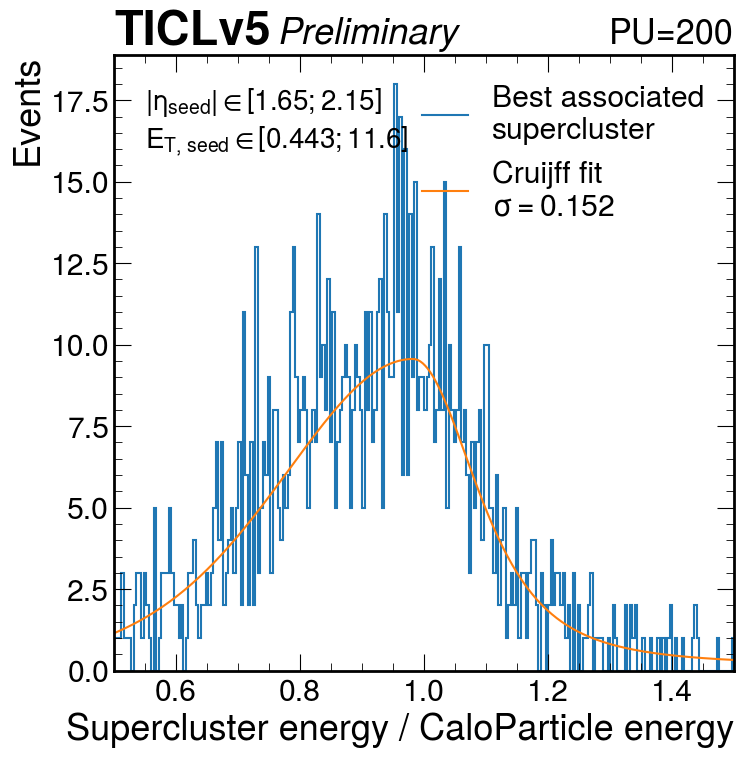

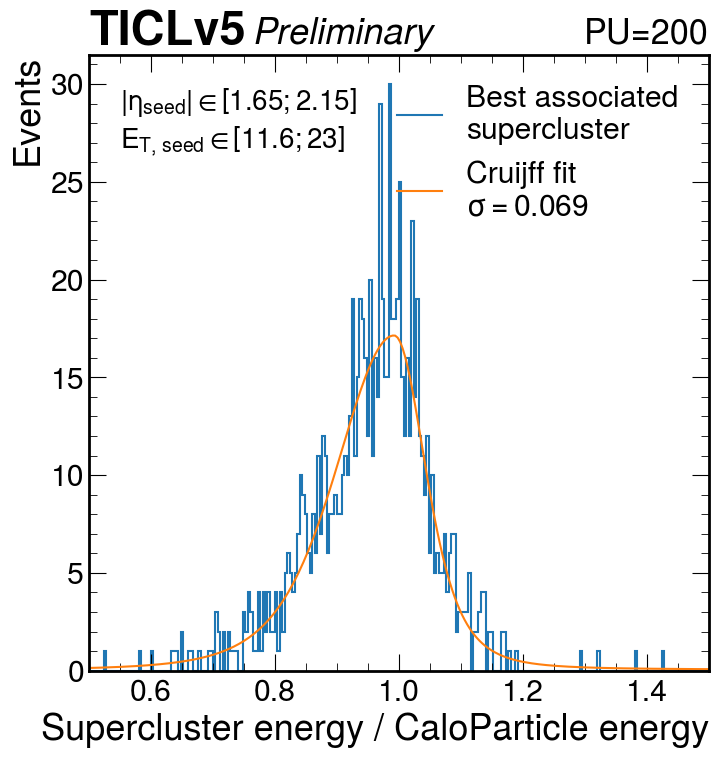

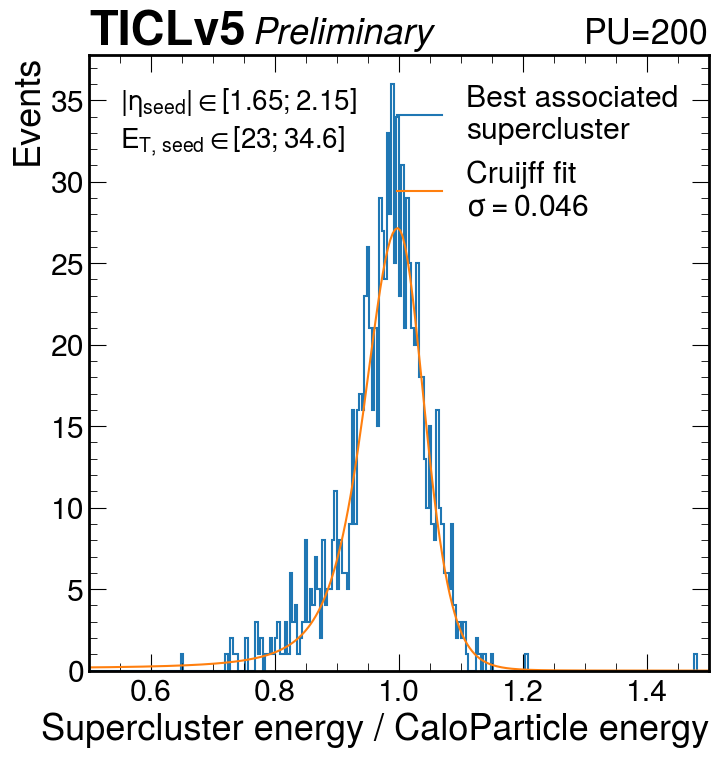

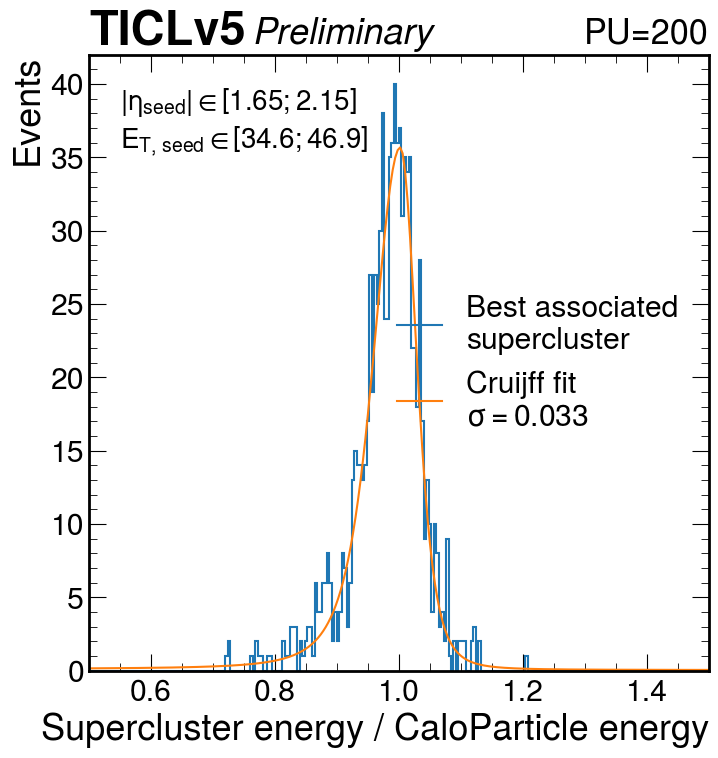

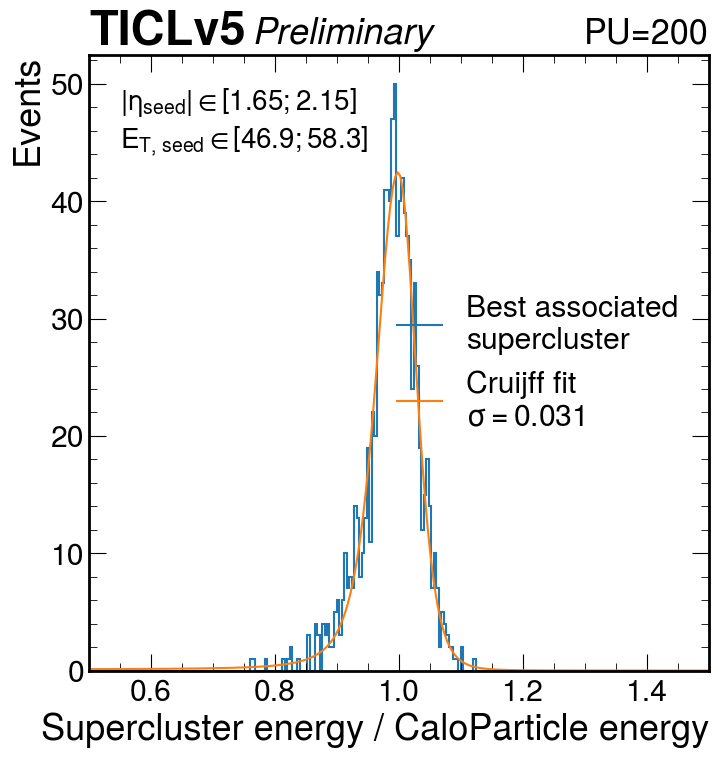

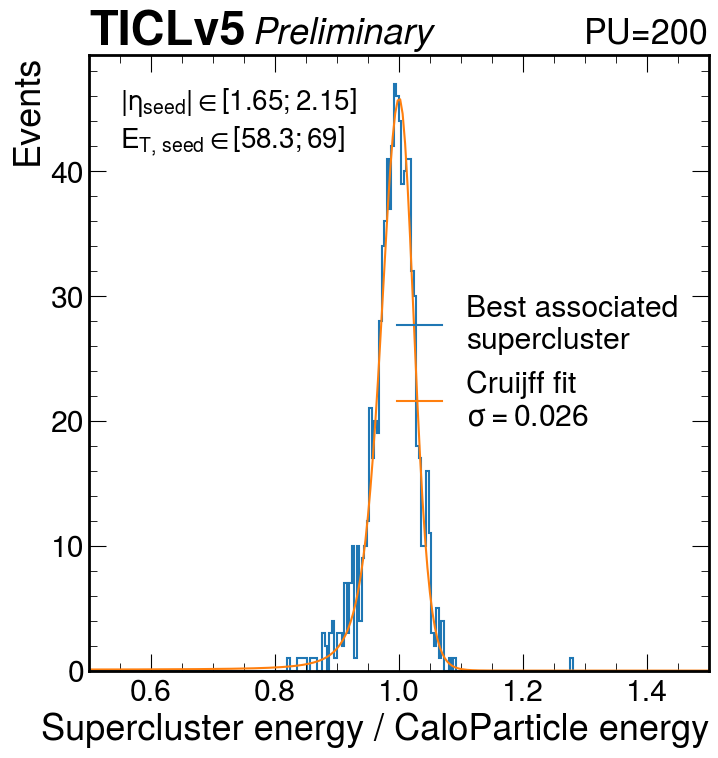

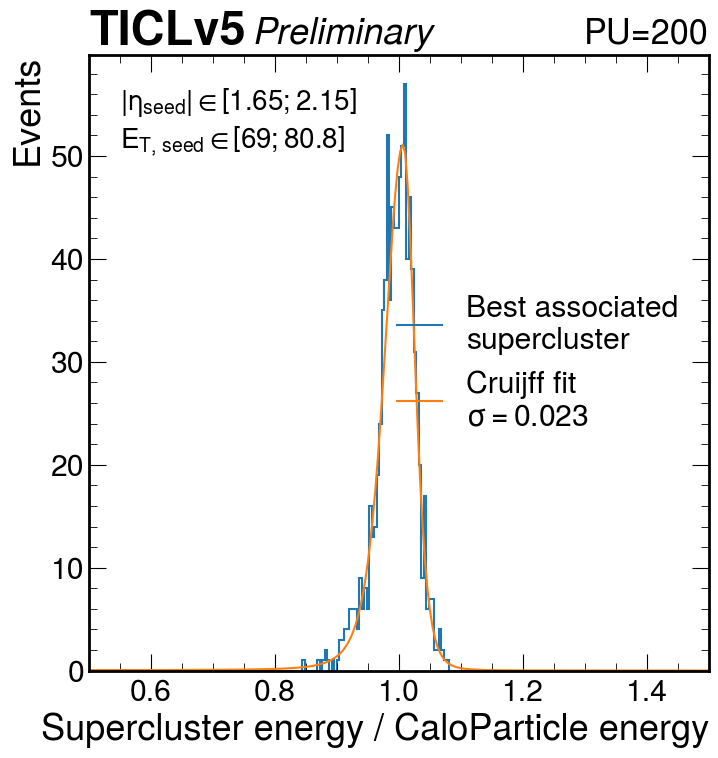

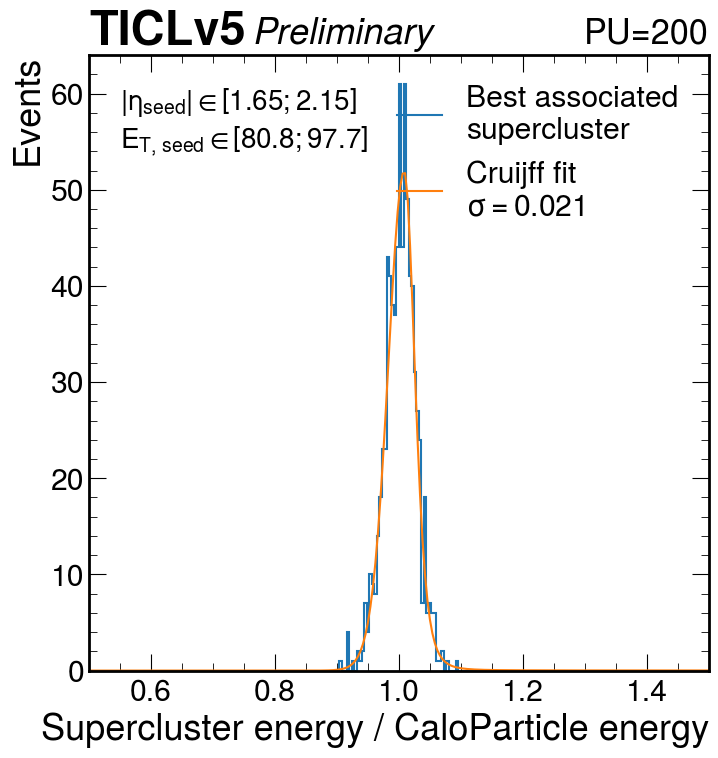

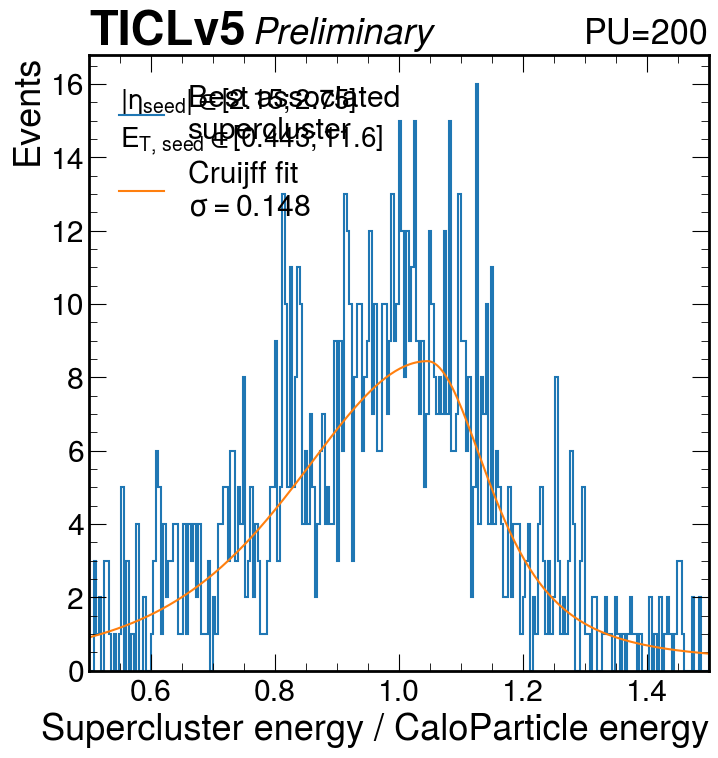

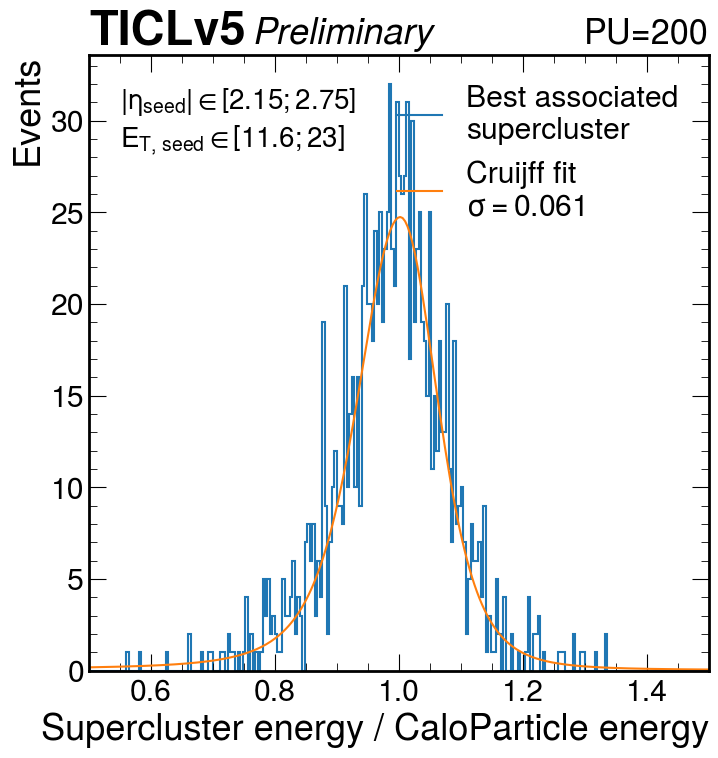

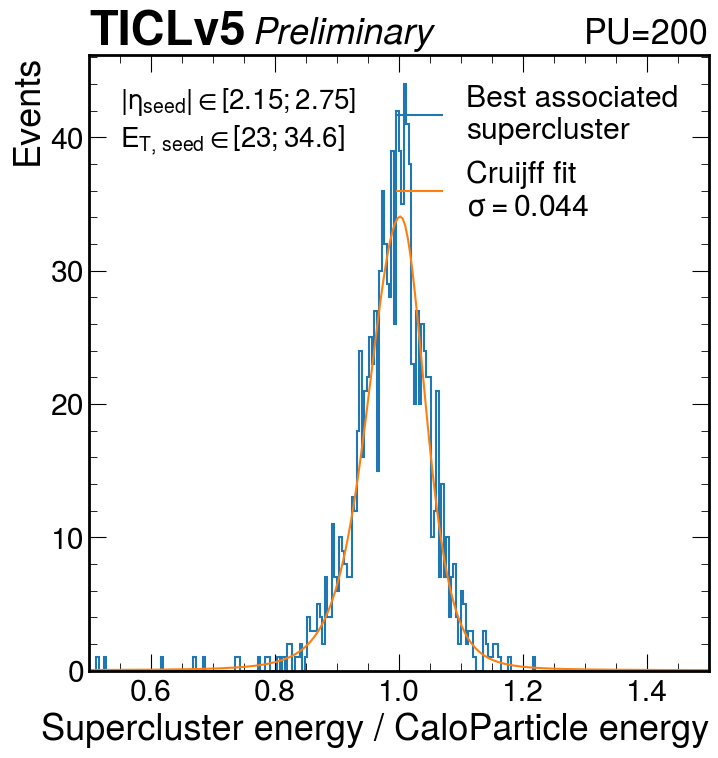

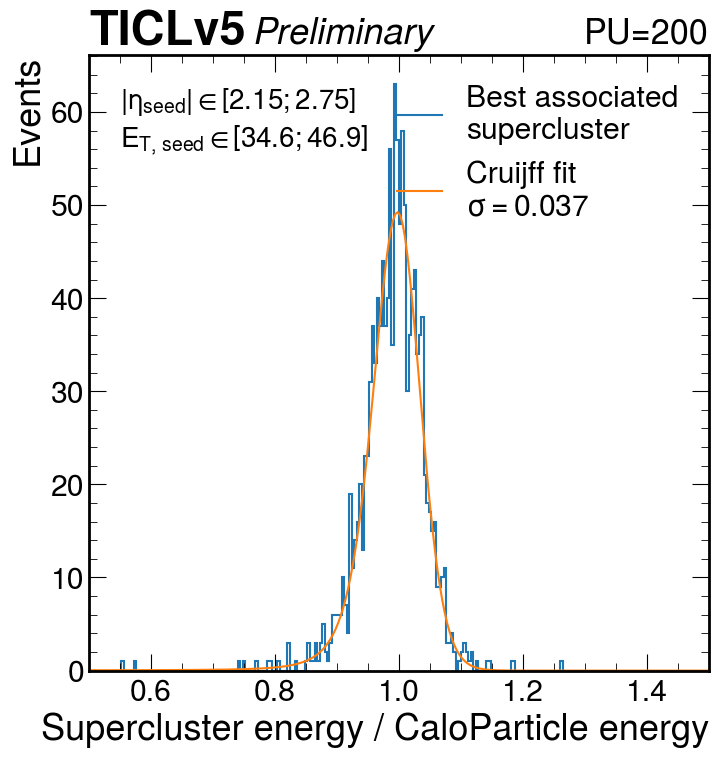

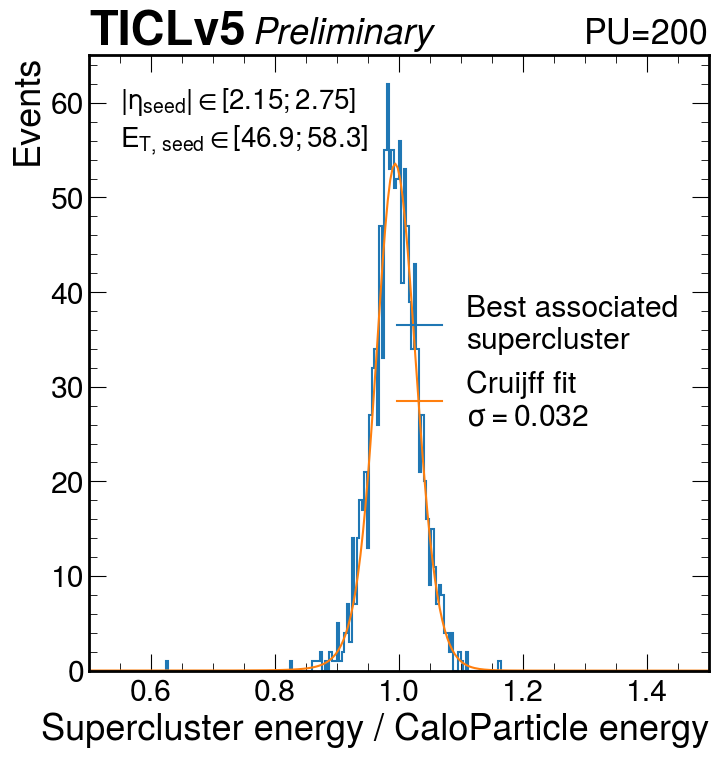

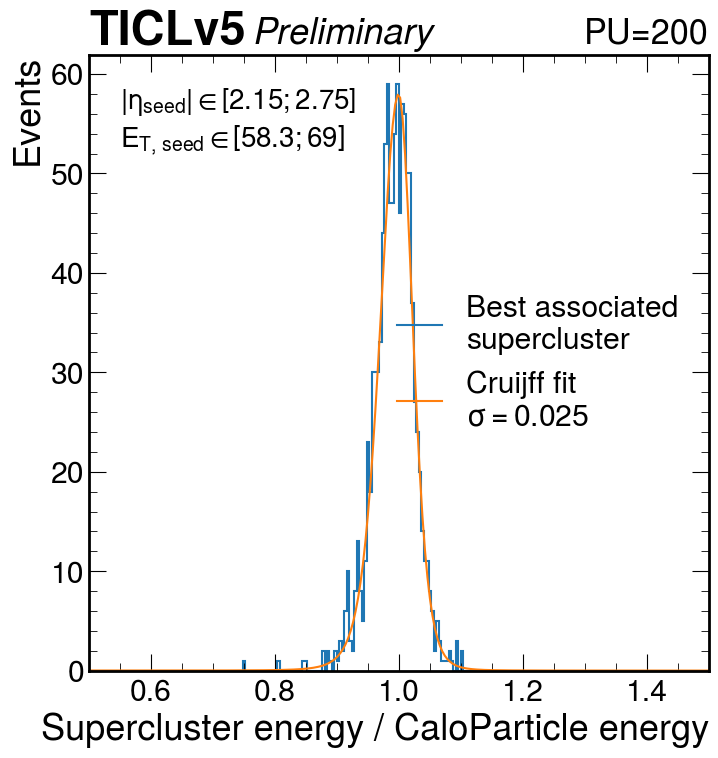

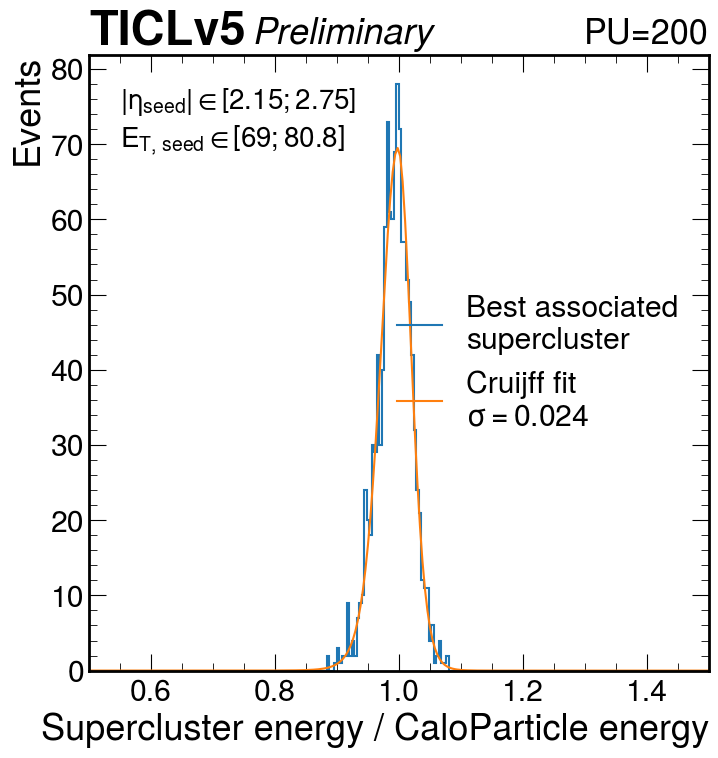

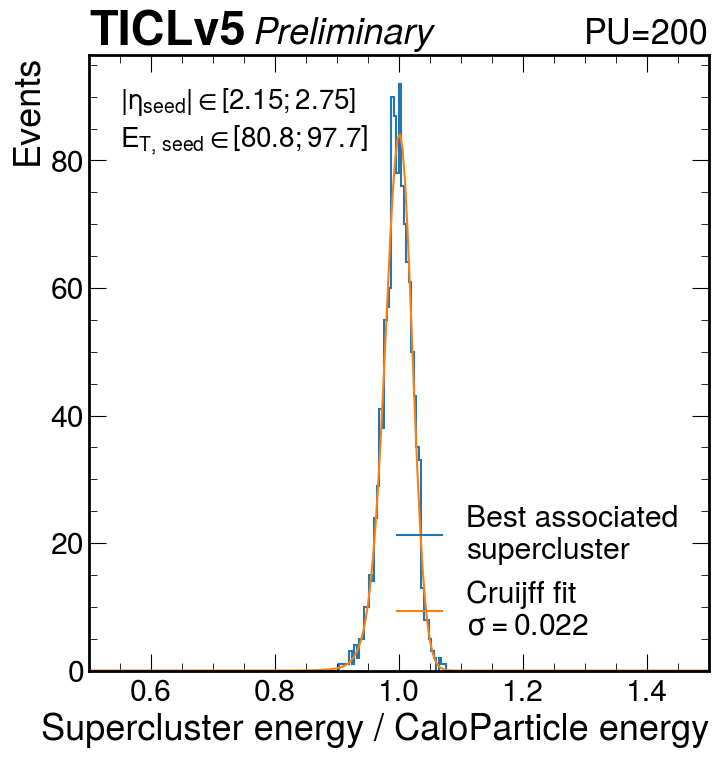

In [33]:
plotAllFits(h_scOverCP_energy, scOverCP_fit)

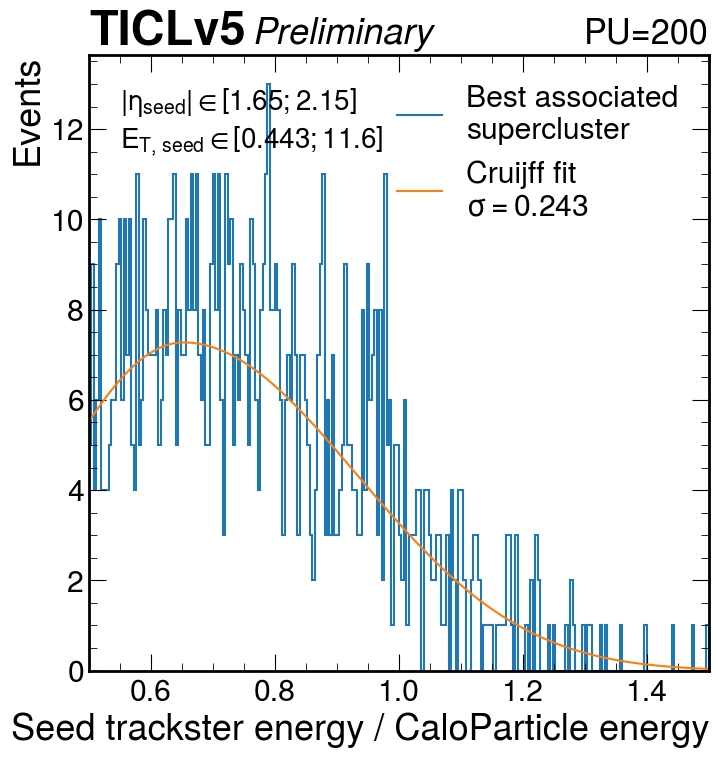

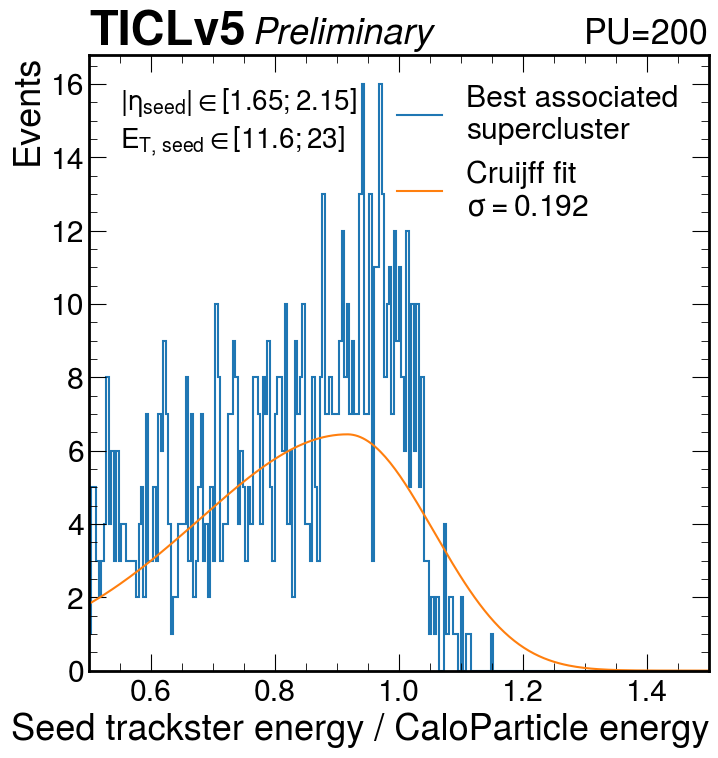

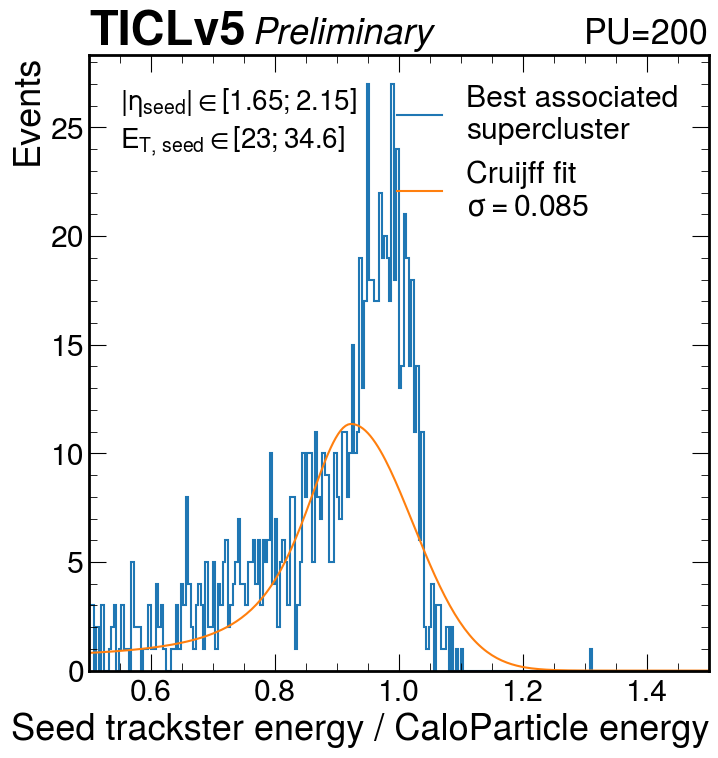

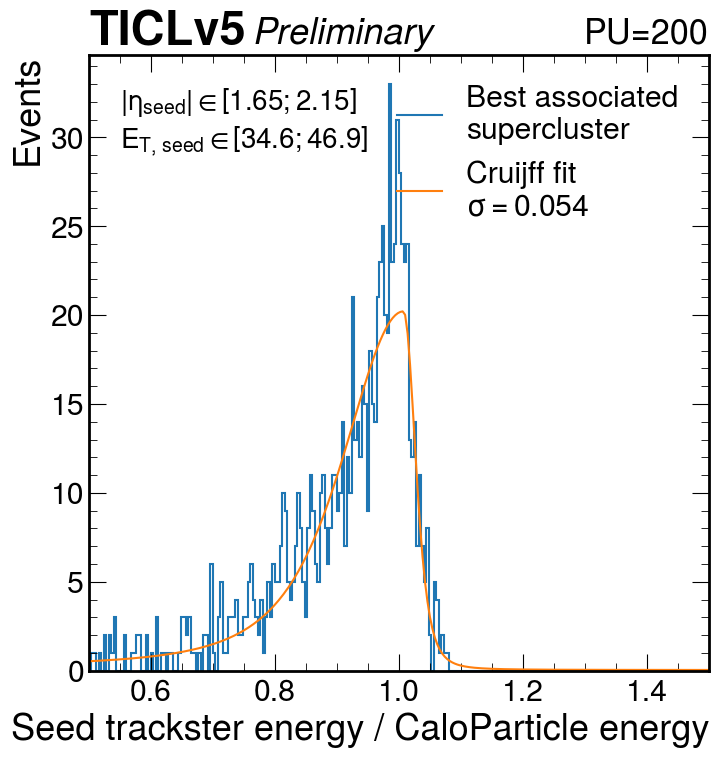

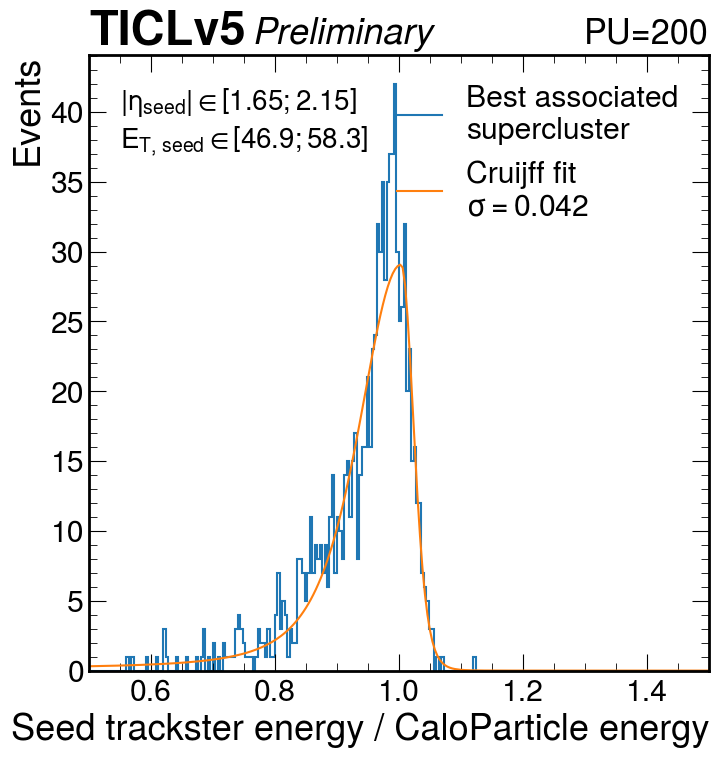

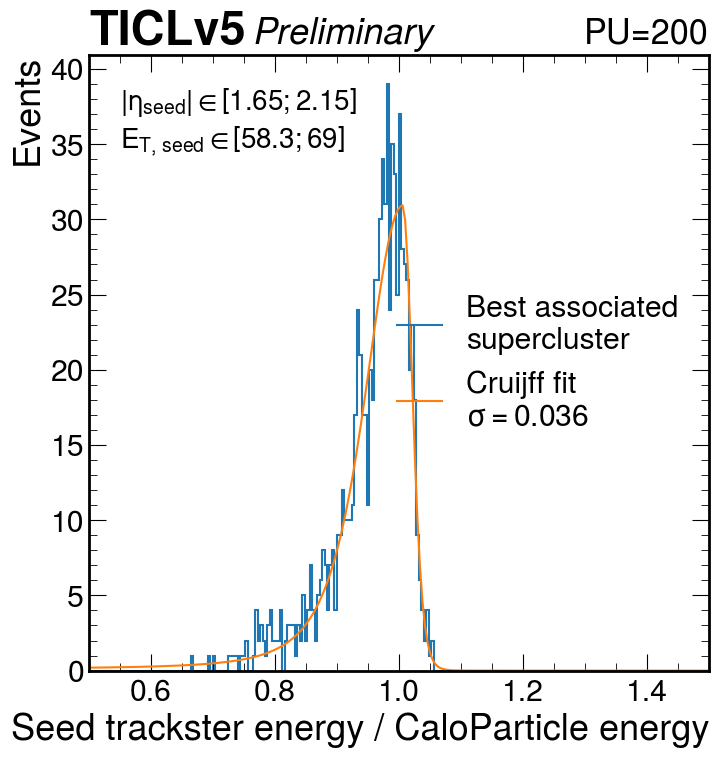

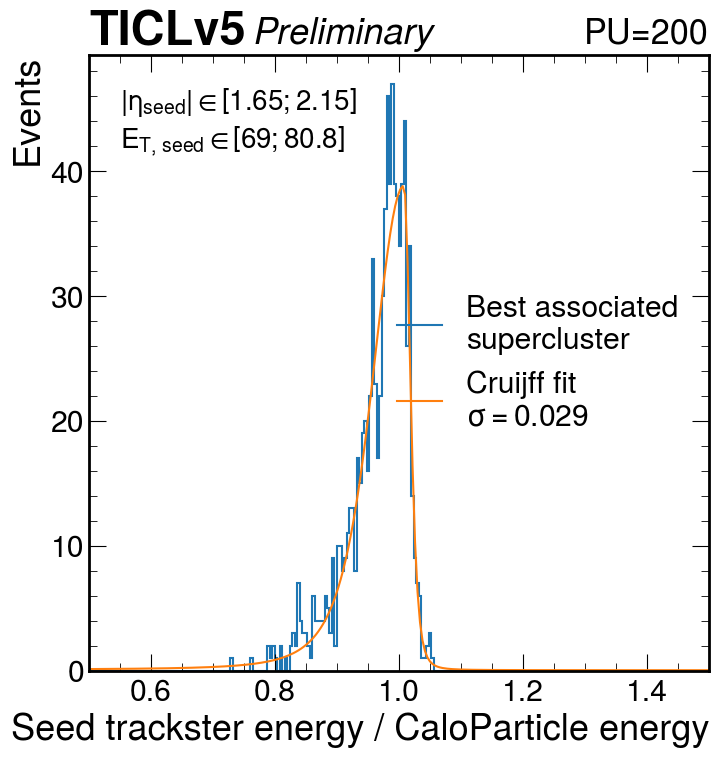

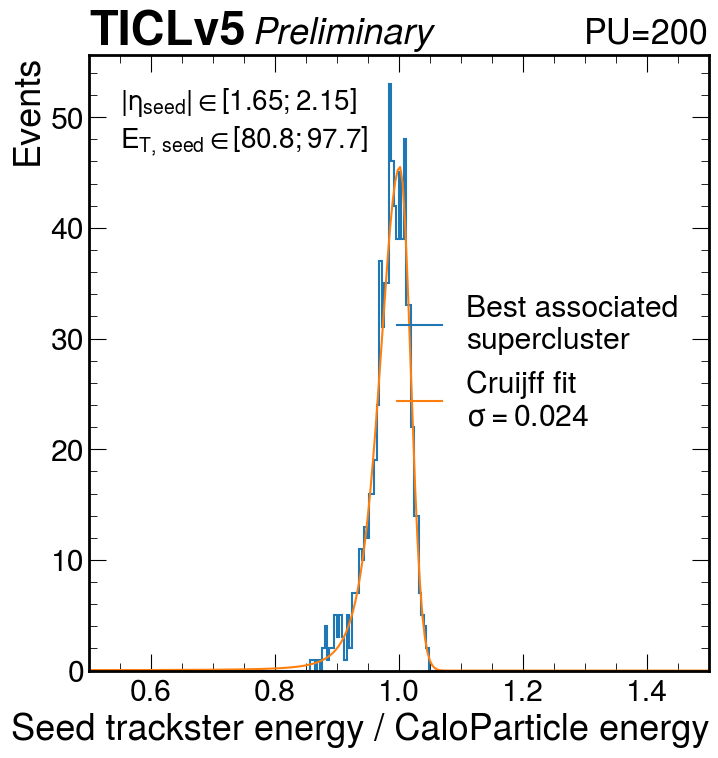

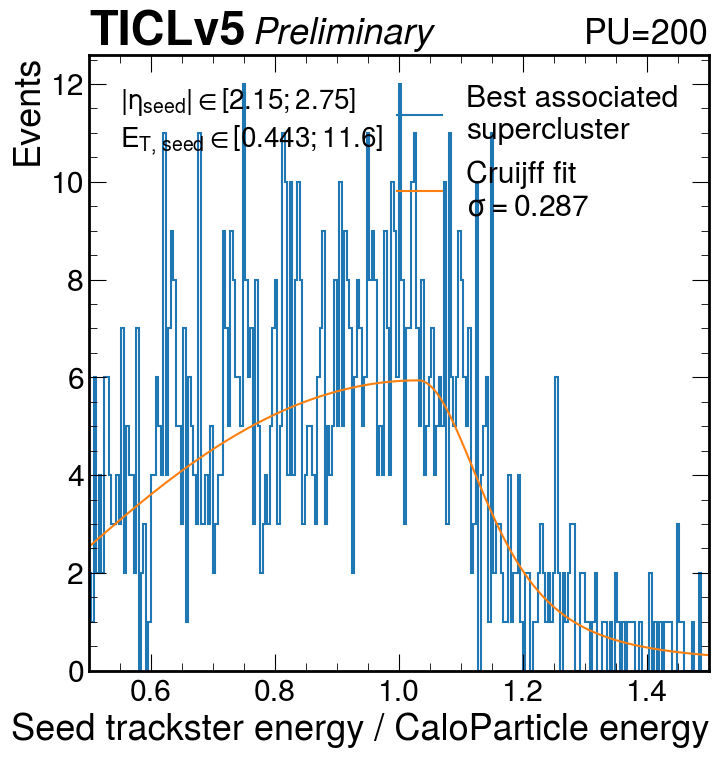

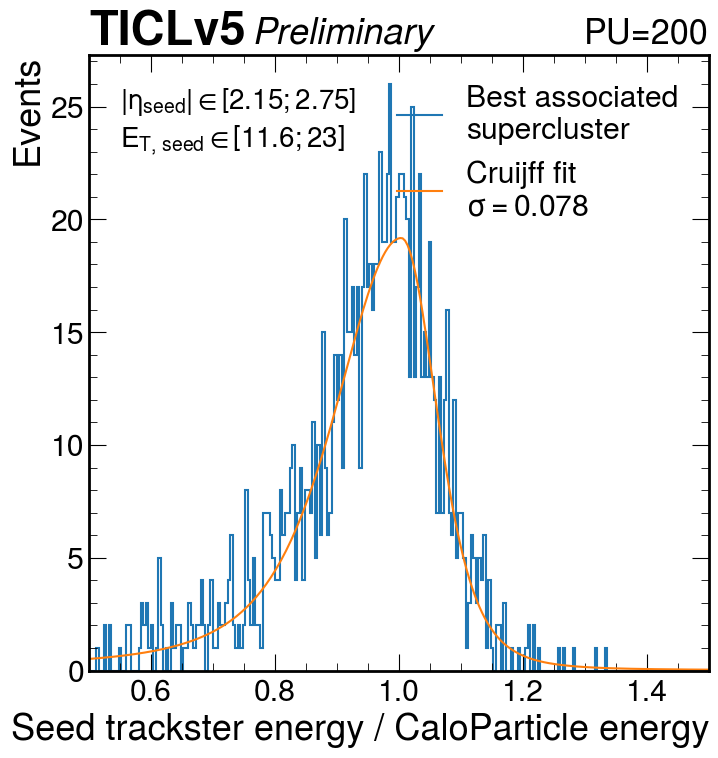

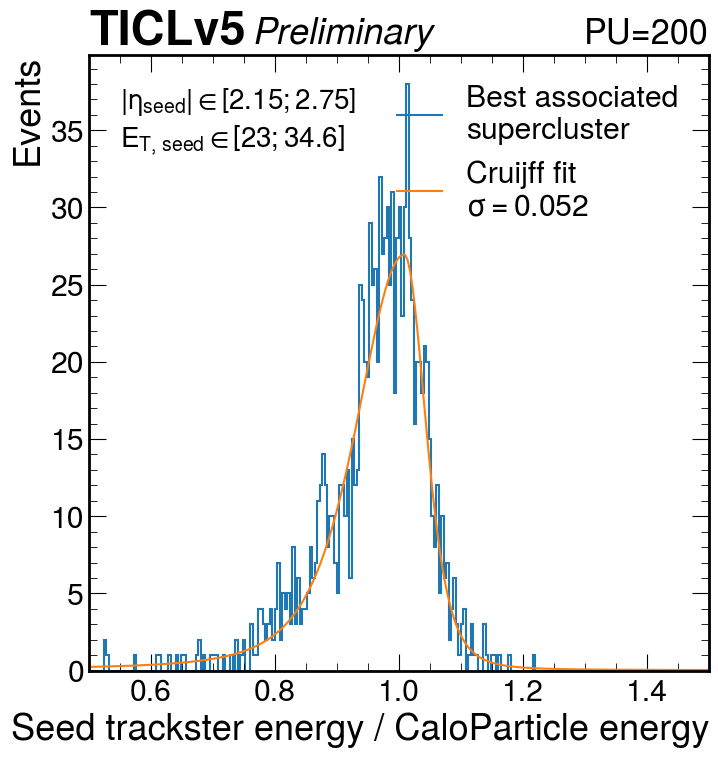

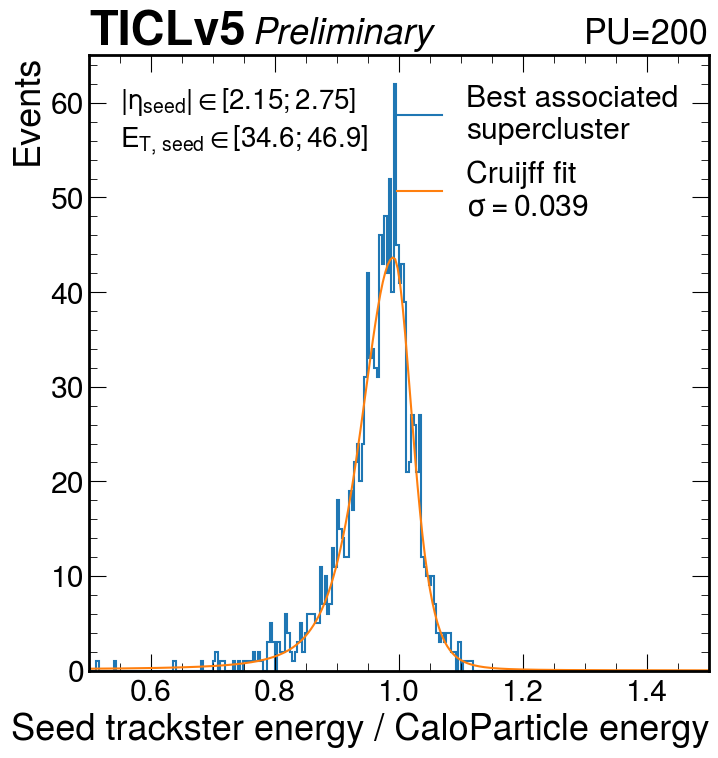

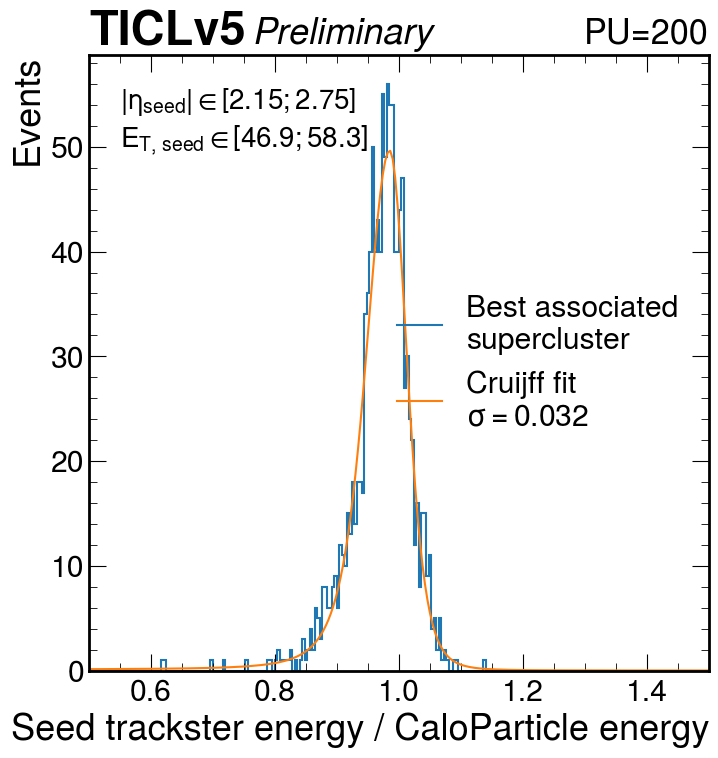

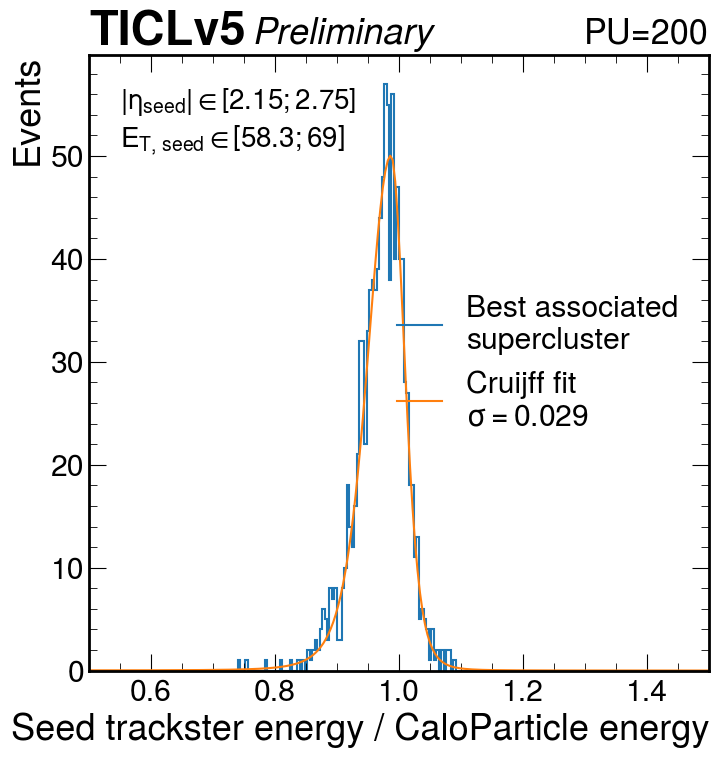

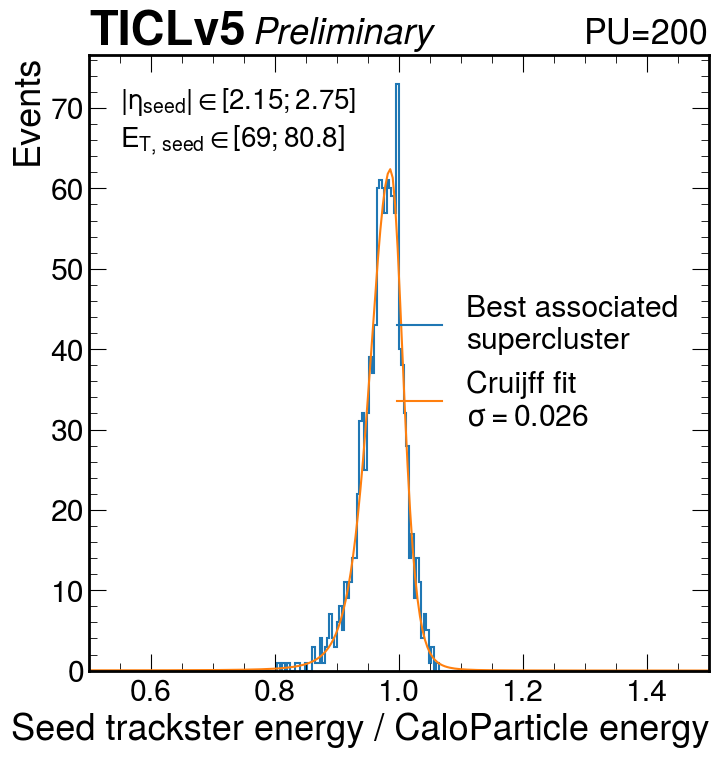

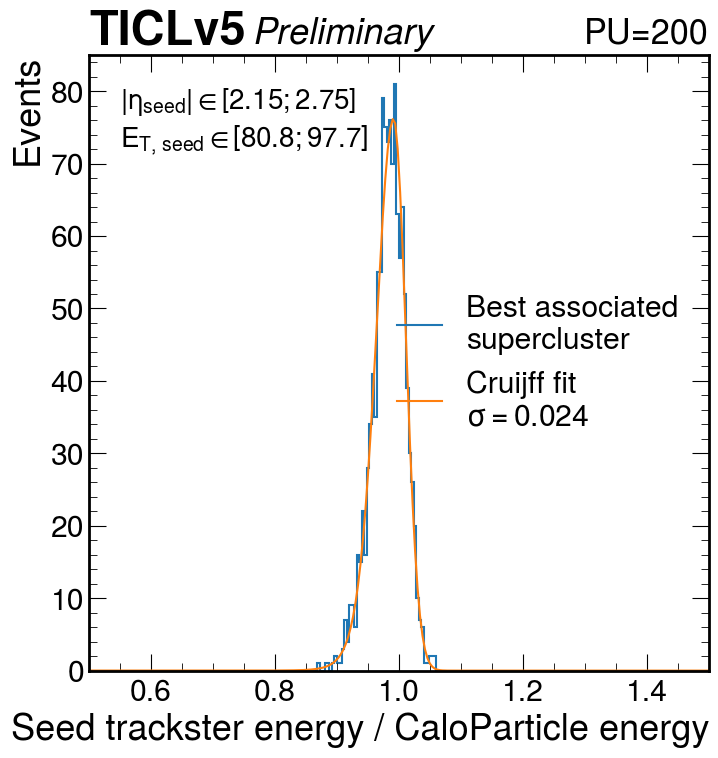

In [34]:
plotAllFits(h_seedOverCP_energy, seedOverCP_fit)

In [26]:
def plotResolution(fitRes:dict[str, list[list[CruijffFitResult]]], legendLabel:dict[str, str]=None, 
              plotMode:Literal["sigma", "mu"]="sigma", ratio:bool=False,
              colors_eta=['tab:blue', 'tab:red', 'tab:green', 'tab:purple'],
              errorbar_common_kwargs=dict(markeredgewidth=1.5, capsize=5, lw=1.5),
              errorbar_individual_kwargs=[ dict(fmt='.', markersize=10), dict(fmt='s', markersize=8, mfc='w'),]):
    """ 
    Parameters : (typeOfData is scOverCP or tsOverCP)
     - fitRes is dict : typeOfData -> 2D list eta*Et of CruiffFitResult
     - legendLabel : dict : typeOfData -> legend label for typeOfData
     - plotMode : plot sigma or mu
    """
    if legendLabel is None:
        legendLabel = {typeOfData : typeOfData for typeOfData in fitRes}
    if ratio:
        assert len(fitRes) == 2, "Ratio mode requires excatly 2 plots"
        fig = plt.figure(figsize=(8, 10))
        grid = fig.add_gridspec(2, 1, hspace=0.08, height_ratios=[3, 1])
        main_ax = fig.add_subplot(grid[0])
        ratio_ax = fig.add_subplot(grid[1], sharex=main_ax)
        plt.setp(main_ax.get_xticklabels(), visible=False)
        if plotMode == "sigma":
            ratio_ax.set_ylabel(r'$\sigma_{DNN} / \sigma_{mainTs}$')
        elif plotMode == "mu":
            ratio_ax.set_ylabel(r'$\mu_{DNN} / \mu_{mainTs}$')
        ratio_ax.axhline(y=1, color='gray', linestyle='--')
        ratio_ax.set_xlabel("Seed $p_T$ (GeV)")
    else:
        fig, main_ax = plt.subplots(figsize=(9, 8))
        main_ax.set_xlabel("Seed $p_T$ (GeV)")
    
    
    for eta_bin in range(len(eta_axis)):
        #for seedPt_bin in range(len(h.axes["seedPt"])):
        yvals_list = []
        xerr_vals = []
        for i, (typeOfData, currentFitResults) in enumerate(fitRes.items()):
            if i == 0:
                xerr = seedPt_axis.widths/2
                xerr_vals.append(xerr)
            else:
                xerr = None
            if plotMode == "sigma":
                yvals = [res.params.sigmaAverage for res in currentFitResults[eta_bin]]
            elif plotMode == "mu":
                yvals = [res.params.m for res in currentFitResults[eta_bin]]
            main_ax.errorbar(seedPt_axis.centers, yvals, xerr=xerr, 
                **(dict(color=colors_eta[eta_bin])|errorbar_common_kwargs|errorbar_individual_kwargs[i]))
            yvals_list.append(yvals)
            #main_ax.errorbar(seedPt_axis.centers, [res.params.sigmaAverage for res in currentFitResults[eta_bin]], xerr=seedPt_axis.widths/2, fmt='.', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=10, color=colors_eta[eta_bin])
            #axs[0].errorbar(bins_mean, sigma_v2, fmt='s', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=8, color=colors_eta[b], mfc='w')
        if ratio:
            ratio_vals = np.array(yvals_list[1])/np.array(yvals_list[0])
            ratio_ax.errorbar(seedPt_axis.centers, ratio_vals, xerr=xerr_vals[0], fmt='x', markeredgewidth=1.5, capsize=5, lw=1.5, markersize=8,
                color=colors_eta[eta_bin])
        #makeRatio(main_ax,inset_axs0, sigma_v2, sigma_mous, colors_eta[b], bins_mean, bins_width, False)
        ## For the legend
        main_ax.errorbar([], [], xerr = [], **(dict(color=colors_eta[eta_bin])|errorbar_common_kwargs|errorbar_individual_kwargs[0]), label=etaBinToText(eta_bin))
    
    for typeOfData, errorbar_kwargs in zip(fitRes.keys(), errorbar_individual_kwargs): # legend
        main_ax.errorbar([], [], xerr = [], **errorbar_kwargs, color='black', label=legendLabel[typeOfData])
    main_ax.legend()
    if plotMode == "sigma":
        main_ax.set_ylabel(r'$\sigma(E_{SC}/E_{GEN})$')
    elif plotMode == "mu":
        main_ax.set_ylabel(r'$\mu(E_{SC}/E_{GEN})$')
    hep.cms.text("Preliminary", exp="TICLv5", ax=main_ax)
    hep.cms.lumitext("PU=200", ax=main_ax)

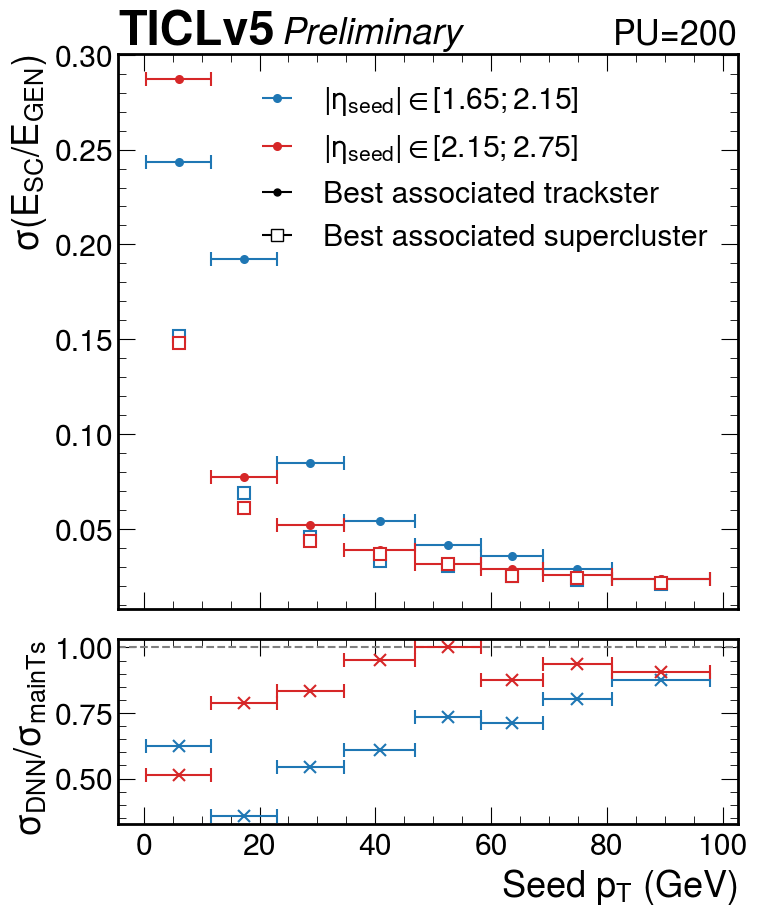

In [28]:
plotResolution({"tsOverCP":seedOverCP_fit, "scOverCP": scOverCP_fit}, legendLabel={"scOverCP" : "Best associated supercluster", "tsOverCP" : "Best associated trackster"},
    ratio=True)

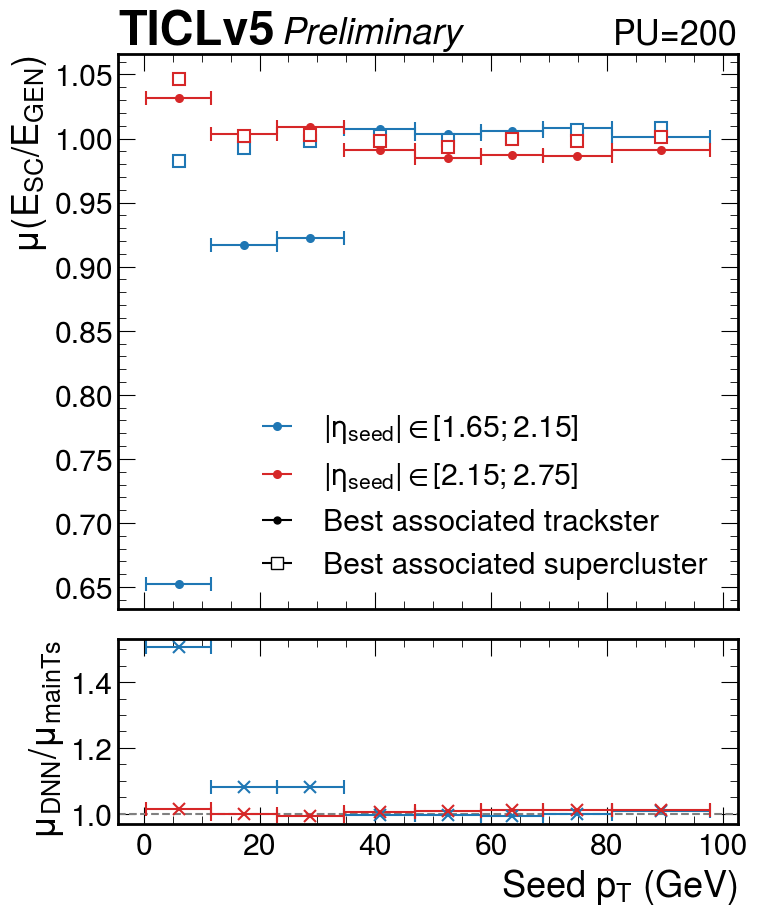

In [29]:
plotResolution({"tsOverCP":seedOverCP_fit, "scOverCP": scOverCP_fit}, plotMode="mu", 
               legendLabel={"scOverCP" : "Best associated supercluster", "tsOverCP" : "Best associated trackster"},
               ratio=True)